# Modelo para predecir numero de shares basado en el nùmero de palabras, para artículos de ML

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Leer archivo csv

In [3]:
data = pd.read_csv("articulos_ml.csv")

In [4]:
data.shape

(161, 8)

## Exploratory Data Analysis (EDA)

In [5]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [6]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


array([[<Axes: title={'center': 'Word count'}>,
        <Axes: title={'center': '# of Links'}>],
       [<Axes: title={'center': '# of comments'}>,
        <Axes: title={'center': '# Images video'}>],
       [<Axes: title={'center': '# Shares'}>, <Axes: >]], dtype=object)

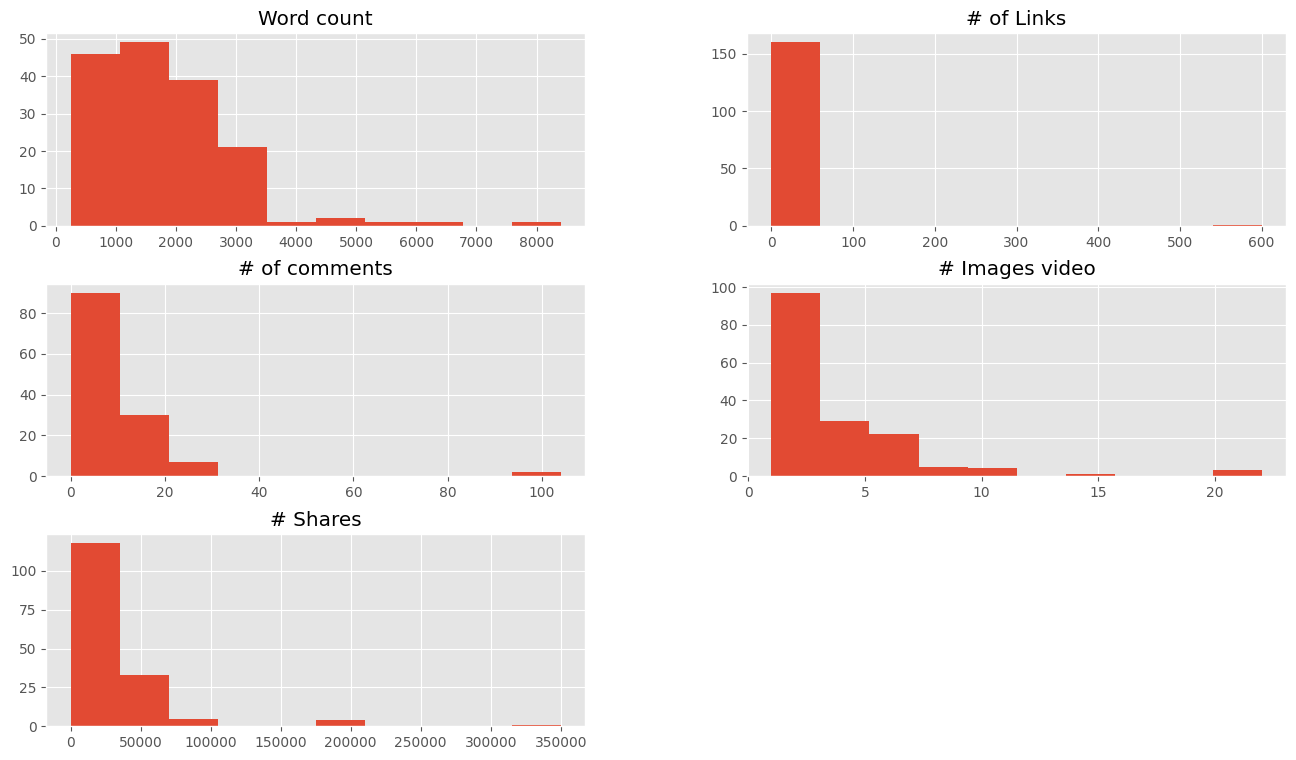

In [10]:
plt.rcParams['figure.figsize']= (16, 9) 
plt.style.use('ggplot')
data.drop(['Title','url','Elapsed days'], axis = 1).hist()

In [11]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

In [12]:
filtered_data.shape

(148, 8)

In [15]:
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

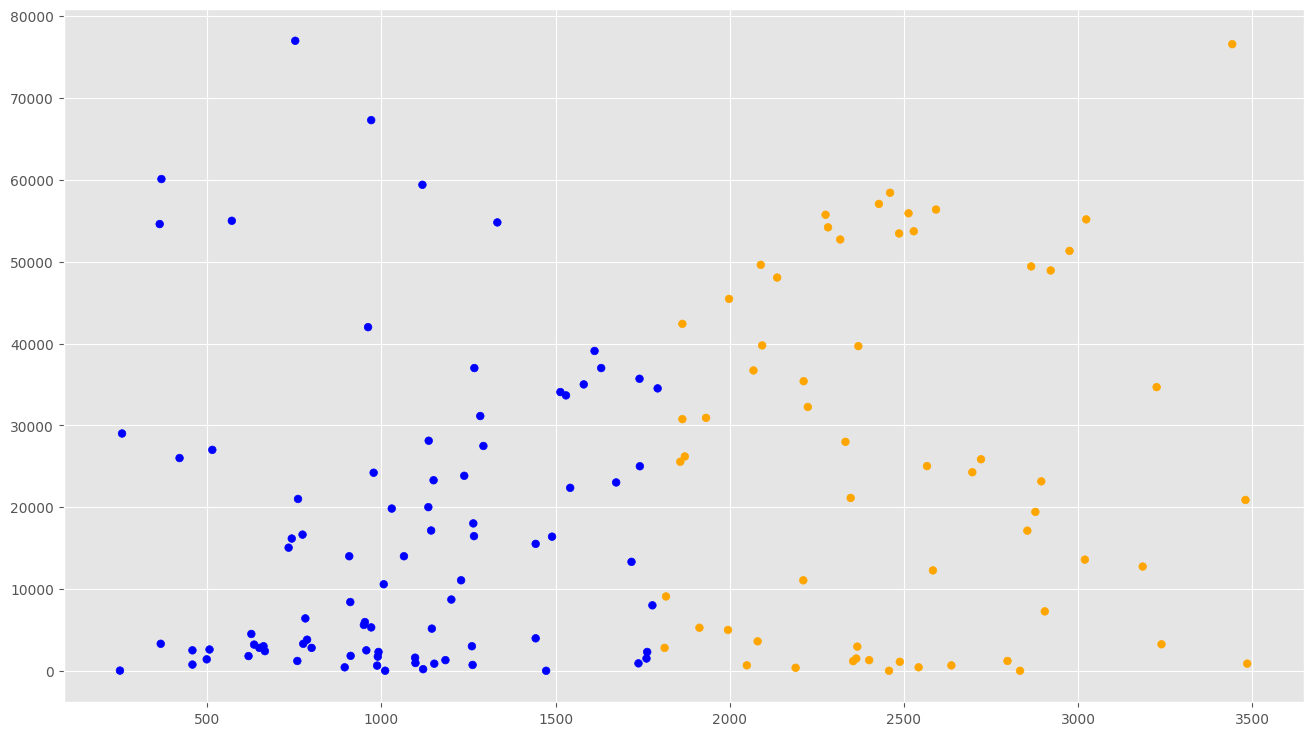

In [17]:
asignar = []
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append('orange')
    else:
        asignar.append('blue')
plt.scatter(f1,f2, c=asignar, s=30)

## Desarrollo del Modelo

In [ ]:
# Separando mis datos para el entrenamiento, donde Word Count es la variable independiente y # Shares es la variable dependiente

In [26]:
X_train = np.array(filtered_data[['Word count']])

In [27]:
y_train = filtered_data['# Shares'].values

In [28]:
X_train[:5]

array([[1742],
       [ 962],
       [ 761],
       [ 753],
       [1118]])

In [29]:
y_train[:5]

array([25000, 42000, 21000, 77000, 59400])

In [30]:
regre = linear_model.LinearRegression()

In [31]:
# Siempre va primero la variable independiente (En este caso X_train) y despuès la dependiente (En este caso y_train)
regre.fit(X_train, y_train)

LinearRegression()

## Revisando la pendiente y la intersección de la linea

In [32]:
print('Pendiente: ', regre.coef_)

Pendiente:  [5.69765366]


In [33]:
print('Intersección de la linea: ', regre.intercept_)

Intersección de la linea:  11200.30322307416


## Realizando predicciones

In [34]:
y_pred = regre.predict(X_train)

In [35]:
y_train[:5]

array([25000, 42000, 21000, 77000, 59400])

In [36]:
y_pred[:5]

array([21125.61589425, 16681.44604148, 15536.21765635, 15490.63642709,
       17570.28001204])

## Graficar la linea que se genera

Text(0.5, 1.0, 'Regresión Lineal')

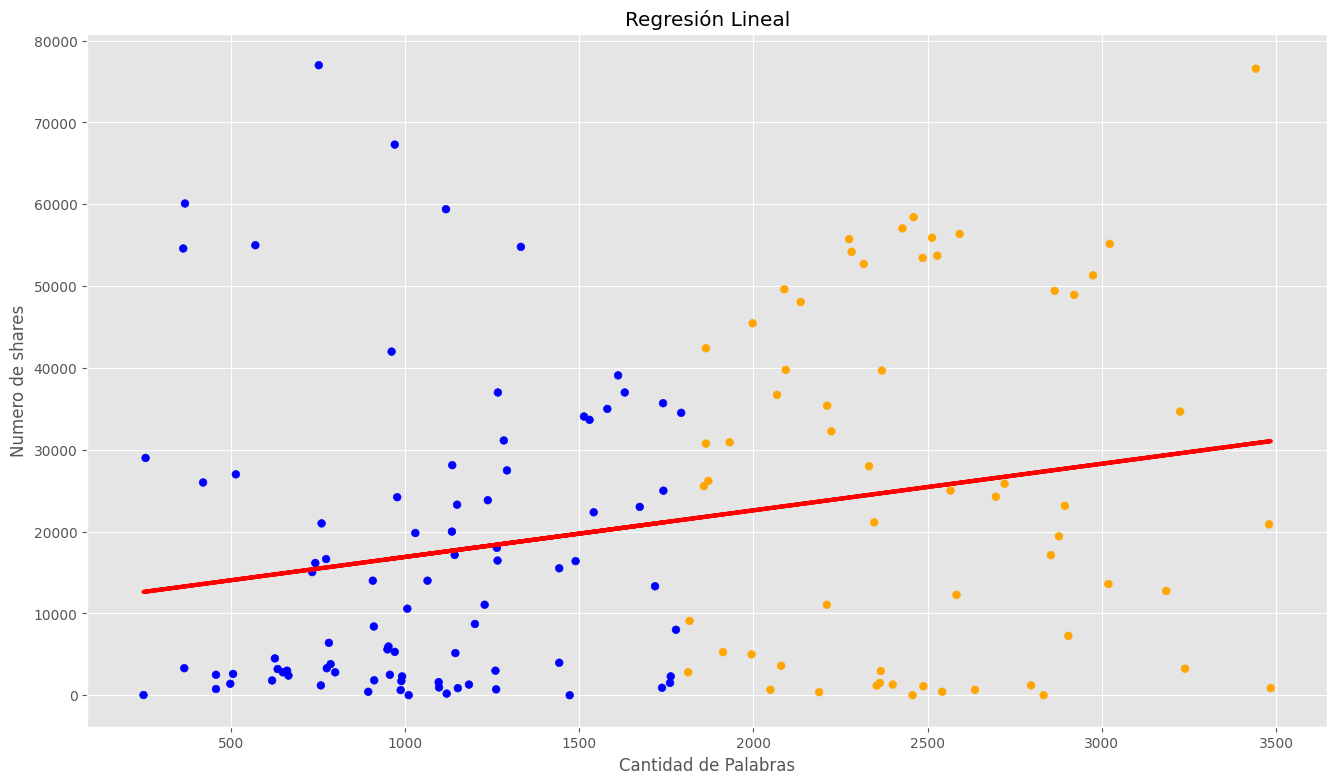

In [37]:
plt.scatter(X_train[:,0],y_train, c=asignar, s=30)
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Numero de shares')
plt.title('Regresión Lineal')

In [38]:
y_pred_2mil = regre.predict([[2000]])
y_pred_2mil

array([22595.61053785])

In [39]:
r2_score(y_train, y_pred)

0.05519842281951404